In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox, yeojohnson

In [2]:
df_orders = pd.read_csv('capstone_dataset/orders_dataset.csv')
df_orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
df_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [5]:
df_orders_clean = df_orders[df_orders['order_status'] == 'delivered']

In [6]:
#this is to create half of database
# min_date = df_orders_clean['order_delivered_customer_date'].min()
# max_date = df_orders_clean['order_delivered_customer_date'].max()
# mid_date = min_date + (max_date -min_date) / 2

In [7]:
#this is to create half of database
# df_orders_clean = df_orders_clean[df_orders_clean['order_delivered_customer_date'] <= mid_date]

In [8]:
df_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [9]:
df_payments = pd.read_csv('capstone_dataset/order_payments_dataset.csv')

df_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [10]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [11]:
order_totals = df_payments.groupby('order_id')['payment_value'].sum()

order_totals.head(1)

order_id
00010242fe8c5a6d1ba2dd792cb16214    72.19
Name: payment_value, dtype: float64

In [12]:
order_totals.info()

<class 'pandas.core.series.Series'>
Index: 99440 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Series name: payment_value
Non-Null Count  Dtype  
--------------  -----  
99440 non-null  float64
dtypes: float64(1)
memory usage: 1.5+ MB


In [13]:
df_orders_orderTotal = pd.merge(df_orders_clean, order_totals, on='order_id', how='left')

df_orders_orderTotal.head(1)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71


In [14]:
print(f"Orders before merge: {len(df_orders)}")
print(f"Rows after merge: {len(df_orders_orderTotal)}")
print(f"Unique orders after merge: {df_orders_orderTotal['order_id'].nunique()}")

Orders before merge: 99441
Rows after merge: 96478
Unique orders after merge: 96478


In [15]:
df_orders_orderTotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 8   payment_value                  96477 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.6+ MB


In [16]:
#view of payment_value on rows with "Nan"

df_orders_orderTotal.loc[df_orders_orderTotal.isnull().any(axis=1),'payment_value']

2921     134.83
5171     349.01
16098    396.86
18494     65.52
20021    354.24
21999    106.81
22478     95.76
26014     54.51
29811       NaN
37158    163.43
38171     39.95
42530    158.07
46957     60.42
59912    154.23
61162     77.06
65678    127.04
70259    157.19
71047    193.98
76909    158.07
80392    204.62
82453    106.81
89883    194.00
94731    120.12
95117     54.97
Name: payment_value, dtype: float64

In [17]:
df_orders_orderTotal.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
count,96478,96464,96476,96470,96478,96477.000000
mean,2018-01-01 23:29:31.939913984,2018-01-02 10:53:23.338012160,2018-01-05 05:01:50.912330240,2018-01-14 12:41:33.581683456,2018-01-25 17:09:52.325711616,159.856357
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,9.590000
25%,2017-09-14 09:00:23.249999872,2017-09-14 14:48:54,2017-09-18 16:46:13.249999872,2017-09-25 22:15:09.500000,2017-10-05 00:00:00,61.880000
50%,2018-01-20 19:45:45,2018-01-22 13:50:04,2018-01-24 16:13:47.500000,2018-02-02 19:32:21,2018-02-16 00:00:00,105.280000
75%,2018-05-05 18:54:47,2018-05-06 10:57:24.750000128,2018-05-08 14:35:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00,176.330000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,13664.080000
std,NaN,NaN,NaN,NaN,NaN,218.813144


In [18]:
#drop/delete ko nalang yung may mga "Nan",more than 20 rows lang naman at di naman nagkakalayo sa mean yung payment_value kaya di naman pasok as "Big Spender" 
#so reliable pa din ang data

df_orders_orderTotal = df_orders_orderTotal.dropna(axis=0)

df_orders_orderTotal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96454 entries, 0 to 96477
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96454 non-null  object        
 1   customer_id                    96454 non-null  object        
 2   order_status                   96454 non-null  object        
 3   order_purchase_timestamp       96454 non-null  datetime64[ns]
 4   order_approved_at              96454 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96454 non-null  datetime64[ns]
 6   order_delivered_customer_date  96454 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96454 non-null  datetime64[ns]
 8   payment_value                  96454 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 7.4+ MB


In [19]:
df_orders_orderTotal.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71


In [20]:
df_order_items = pd.read_csv('capstone_dataset/order_items_dataset.csv')

In [21]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
#check for duplicates
duplicates = df_order_items.duplicated().sum()

duplicates

np.int64(0)

In [23]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

In [24]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [25]:
df_orderItems_ordersOrderTotal = pd.merge(df_order_items[['order_id','order_item_id']], df_orders_orderTotal, on='order_id', how='left')

df_orderItems_ordersOrderTotal.head(1)

,order_id,order_item_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19


In [26]:
print(f"Orders before merge: {len(df_order_items)}")
print(f"Rows after merge: {len(df_orderItems_ordersOrderTotal)}")
print(f"Unique orders after merge: {df_orderItems_ordersOrderTotal['order_id'].nunique()}")

Orders before merge: 112650
Rows after merge: 112650
Unique orders after merge: 98666


In [27]:
df_orderItems_ordersOrderTotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   customer_id                    110170 non-null  object        
 3   order_status                   110170 non-null  object        
 4   order_purchase_timestamp       110170 non-null  datetime64[ns]
 5   order_approved_at              110170 non-null  datetime64[ns]
 6   order_delivered_carrier_date   110170 non-null  datetime64[ns]
 7   order_delivered_customer_date  110170 non-null  datetime64[ns]
 8   order_estimated_delivery_date  110170 non-null  datetime64[ns]
 9   payment_value                  110170 non-null  float64       
dtypes: datetime64[ns](5), float64(1), int64(1), object(3)
memory usage: 

In [28]:
#drop rows without customer_id
df_orderItems_ordersOrderTotal.dropna(subset=['customer_id'],inplace=True)

In [29]:
df_orderItems_ordersOrderTotal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110170 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110170 non-null  object        
 1   order_item_id                  110170 non-null  int64         
 2   customer_id                    110170 non-null  object        
 3   order_status                   110170 non-null  object        
 4   order_purchase_timestamp       110170 non-null  datetime64[ns]
 5   order_approved_at              110170 non-null  datetime64[ns]
 6   order_delivered_carrier_date   110170 non-null  datetime64[ns]
 7   order_delivered_customer_date  110170 non-null  datetime64[ns]
 8   order_estimated_delivery_date  110170 non-null  datetime64[ns]
 9   payment_value                  110170 non-null  float64       
dtypes: datetime64[ns](5), float64(1), int64(1), object(3)
memory usage: 9.2+ 

In [30]:
df_orderItems_ordersOrderTotal.head(1)

,order_id,order_item_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19


In [31]:
#Define analysis date (max date + 1 day)
analysis_date = df_orderItems_ordersOrderTotal['order_delivered_customer_date'].max() + pd.Timedelta(days=1)

In [32]:
#Calculate RFM at customer level
rfm = df_orderItems_ordersOrderTotal.groupby('customer_id', as_index=False).agg({
    'order_delivered_carrier_date' : lambda x: (analysis_date - x.max()).days,
    'order_id' : 'count',
    'payment_value' : 'sum'
})

rfm.columns = ['customer_id', 'Recency(days)', 'Frequency','Monetary']



In [33]:
#Remove skewness, outliers, and clusters.

# rfm['Frequency'] = np.log1p(rfm['Frequency'])
# rfm['Frequency'], lambda_yj = yeojohnson(rfm['Frequency'])

# rfm.drop(rfm[rfm['Recency(days)'] > 660].index,inplace=True)

rfm['Monetary'] = np.log1p(rfm['Monetary'])

In [34]:
 #Recency: lower days = better score
rfm['R_Score'] = pd.cut(
    rfm['Recency(days)'],
    bins=[-1, 30, 90, 180, 365, float('inf')],
    labels=[5, 4, 3, 2, 1]
)

In [35]:
#Frequency: Higher = better score
rfm['F_Score'] = pd.cut(
    rfm['Frequency'],
    bins=[0, 1, 3, 6, 10, float('inf')],
    labels=[1, 2, 3, 4, 5]
)

In [36]:
#Monetary: Higher = better score
rfm['M_Score'] = pd.cut(
    rfm['Monetary'],
    bins=[0, 1000, 3000, 6000, 10000, float('inf')],
    labels=[1, 2, 3, 4, 5]
)

In [37]:
def segment_customer(row):
    r = row['R_Score']
    f = row['F_Score']
    m = row['M_Score']

    #Champions: High on all three
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'

    #Loyal: High fequency, decent recency
    if r >= 3 and f >= 4:
        return 'Loyal Customers'

    #At Risk: Used to be good
    if r <= 2 and (f >= 3 or m >= 3):
        return 'At Risk'

    #New Customers: Recent but low frequency
    if r >= 4 and f <= 2:
        return 'New Customers'

    #Lost: Low on everything
    if r <= 2 and f <= 2 and m <= 2:
        return 'Lost'

    #Big Spenders: High value, low frequency
    if  f <= 2 and m >= 4:
        return 'Big Spenders'

    else:
        return 'Needs Attention'

In [38]:
rfm['Segment_label'] = rfm.apply(segment_customer, axis=1)

In [39]:
rfm.head(1)

,customer_id,Recency(days),Frequency,Monetary,R_Score,F_Score,M_Score,Segment_label
0,00012a2ce6f8dcda20d059ce98491703,334,1,4.751346,2,1,1,Lost


In [40]:
df_orderItems_ordersOrderTotal_segment = pd.merge(df_orderItems_ordersOrderTotal, rfm[['customer_id','R_Score','F_Score','M_Score', 'Segment_label']], on='customer_id', how='left')

df_orderItems_ordersOrderTotal_segment.head(1)

,order_id,order_item_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,R_Score,F_Score,M_Score,Segment_label
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19,1,1,1,Lost


In [41]:
print(f"Orders before merge: {len(df_orderItems_ordersOrderTotal)}")
print(f"Rows after merge: {len(df_orderItems_ordersOrderTotal_segment)}")
print(f"Unique orders after merge: {df_orderItems_ordersOrderTotal_segment['customer_id'].nunique()}")

Orders before merge: 110170
Rows after merge: 110170
Unique orders after merge: 96454


In [42]:
df_orderItems_ordersOrderTotal_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110170 entries, 0 to 110169
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110170 non-null  object        
 1   order_item_id                  110170 non-null  int64         
 2   customer_id                    110170 non-null  object        
 3   order_status                   110170 non-null  object        
 4   order_purchase_timestamp       110170 non-null  datetime64[ns]
 5   order_approved_at              110170 non-null  datetime64[ns]
 6   order_delivered_carrier_date   110170 non-null  datetime64[ns]
 7   order_delivered_customer_date  110170 non-null  datetime64[ns]
 8   order_estimated_delivery_date  110170 non-null  datetime64[ns]
 9   payment_value                  110170 non-null  float64       
 10  R_Score                        110170 non-null  category      
 11  

In [43]:
dfs = df_orderItems_ordersOrderTotal_segment[df_orderItems_ordersOrderTotal_segment['Segment_label'] == 'Champions']

dfs.head(5)

,order_id,order_item_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,R_Score,F_Score,M_Score,Segment_label


In [44]:
df_orderItems_ordersOrderTotal_segment.drop_duplicates(subset=['customer_id'],keep='first',inplace=True)

In [45]:
df_orderItems_ordersOrderTotal_segment.drop(['order_status','order_item_id'],axis=1,inplace=True)

In [46]:
df_orderItems_ordersOrderTotal_segment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96454 entries, 0 to 110169
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96454 non-null  object        
 1   customer_id                    96454 non-null  object        
 2   order_purchase_timestamp       96454 non-null  datetime64[ns]
 3   order_approved_at              96454 non-null  datetime64[ns]
 4   order_delivered_carrier_date   96454 non-null  datetime64[ns]
 5   order_delivered_customer_date  96454 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96454 non-null  datetime64[ns]
 7   payment_value                  96454 non-null  float64       
 8   R_Score                        96454 non-null  category      
 9   F_Score                        96454 non-null  category      
 10  M_Score                        96454 non-null  category      
 11  Segment_label      

In [47]:
df_orderItems_ordersOrderTotal_segment.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,R_Score,F_Score,M_Score,Segment_label
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,72.19,1,1,1,Lost
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,259.83,1,1,1,Lost
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,216.87,2,1,1,Lost
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,25.78,4,1,1,New Customers
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,218.04,1,1,1,Lost


In [48]:
df_orderItems_ordersOrderTotal_segment['Segment_label'].value_counts()

Segment_label
Lost               67465
Needs Attention    18441
New Customers       9875
At Risk              656
Loyal Customers       17
Name: count, dtype: int64

In [49]:
# df_orderItems_ordersOrderTotal_segment.to_csv('group_4_customer_segments.csv')

In [50]:
#Average order value by segment
#  - eto yung ilang pera pinapsok nila per segment
aov_by_segment = df_orderItems_ordersOrderTotal_segment.groupby('Segment_label')['payment_value'].mean()

aov_by_segment

Segment_label
At Risk            473.674451
Lost               155.038307
Loyal Customers    710.453529
Needs Attention    166.566815
New Customers      158.461578
Name: payment_value, dtype: float64

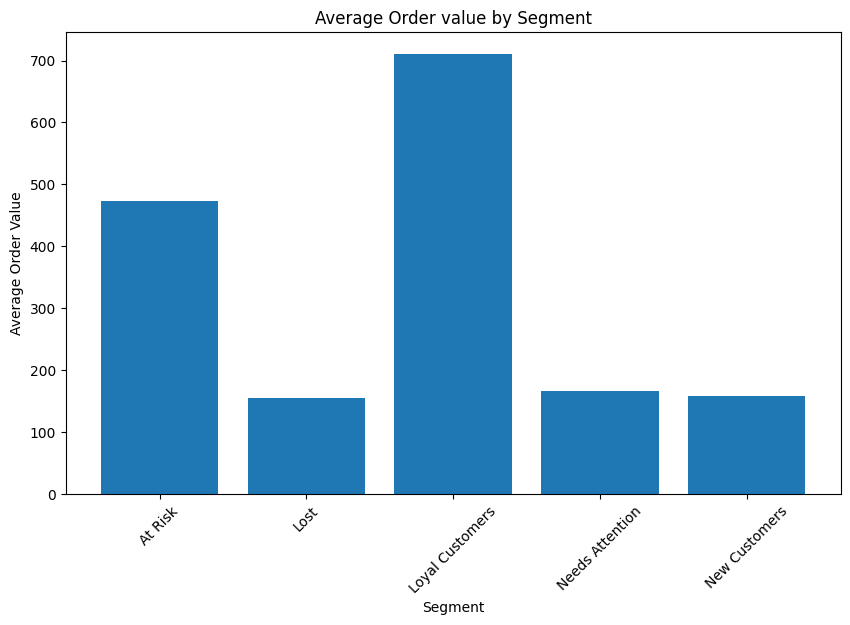

In [51]:
plt.figure(figsize=(10,6))
plt.bar(aov_by_segment.index,aov_by_segment.values)
plt.title('Average Order value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45);
plt.show()

In [52]:
customer_per_segment = df_orderItems_ordersOrderTotal_segment.groupby('Segment_label')['customer_id'].count()

customer_per_segment

Segment_label
At Risk              656
Lost               67465
Loyal Customers       17
Needs Attention    18441
New Customers       9875
Name: customer_id, dtype: int64

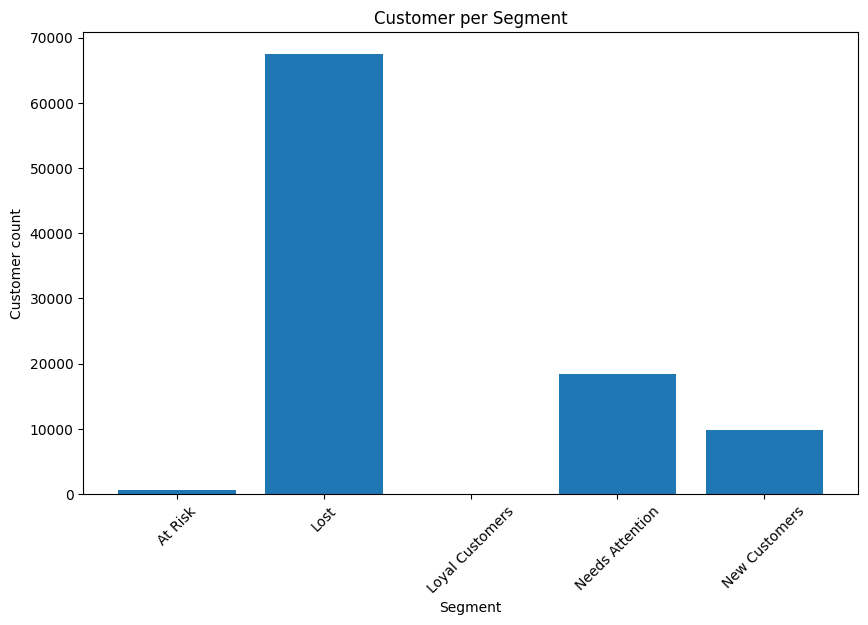

In [53]:
plt.figure(figsize=(10,6))
plt.bar(customer_per_segment.index,customer_per_segment.values)
plt.title('Customer per Segment')
plt.xlabel('Segment')
plt.ylabel('Customer count')
plt.xticks(rotation=45);
plt.show()

In [54]:
##this is to create half of database
# df_orderItems_ordersOrderTotal_segment.to_csv('df_first_half.csv')

In [55]:
first_half = pd.read_csv('df_first_half.csv')

second_half = pd.read_csv('df_second_half.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'df_first_half.csv'

In [ ]:
aov_by_segment_firstHalf = first_half.groupby('Segment_label')['payment_value'].mean()

aov_by_segment_secondHalf = second_half.groupby('Segment_label')['payment_value'].mean()

In [ ]:
aov_in_first_second_half = pd.DataFrame({
    'First_half' : aov_by_segment_firstHalf,
    'Second_half' : aov_by_segment_secondHalf
})

In [ ]:
customer_per_segment_firstHalf = first_half.groupby('Segment_label')['customer_id'].count()

customer_per_segment_secondHalf = second_half.groupby('Segment_label')['customer_id'].count()

In [ ]:
customer_per_segment_first_second_half = pd.DataFrame({
    'First_half' : customer_per_segment_firstHalf,
    'Second_half' : customer_per_segment_secondHalf
})

In [ ]:
# comparison from 4th-quarter2016 to 3rd-quarter2017 vs 4th-quarter2017 to 3rd-quarter2018

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

aov_in_first_second_half.plot(kind='bar', ax=axes[0])
axes[0].set_title('AOV Comparison: 2016Q4-2017Q3 vs 2017Q4-2018Q3', fontsize=12) 
axes[0].set_xlabel('Segment', fontsize=8) 
axes[0].set_ylabel('Average Order Value', fontsize=8) 
axes[0].tick_params(rotation=45);

customer_per_segment_first_second_half.plot(kind='bar', ax=axes[1])
axes[1].set_title('Customer per Segment: 2016Q4-2017Q3 vs 2017Q4-2018Q3', fontsize=12) 
axes[1].set_xlabel('Segment', fontsize=8) 
axes[1].set_ylabel('Customer count', fontsize=8)
axes[1].tick_params(rotation=45);

plt.tight_layout()
plt.show()